# 关系拟合（回归）

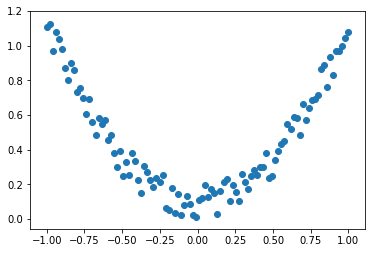

In [4]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)#shape = (100,1)
y = x.pow(2) + 0.2*torch.rand(x.size())#这里的后面加的是随机噪声

#用Variable 来修饰这些数据tensor
x,y = torch.autograd.Variable(x), Variable(y)

#画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### 传统神经网络
    初始化的时候需要特征和隐藏层的size

In [7]:
import torch
import torch.nn.functional as F #激励函数

class Net(torch.nn.Module):#继承torch的Module
    def __init__(self, n_feature, n_hidden, n_output):
        
        super(Net, self).__init__()#继承__init__功能
        
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
net = Net(n_feature = 1, n_hidden = 10, n_output = 1)

#看下net的结构
print (net)

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


### 训练网络

In [8]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)
loss_func = torch.nn.MSELoss()

for i in range(100):
    prediction = net(x)
    #得预测值后进行误差分析
    loss = loss_func(prediction, y)
    #进行参数优化
    optimizer.zero_grad() #清空上一步的残余更新参数值
    loss.backward()     # 误差反向传播, 计算参数更新值
    optimizer.step()   #将参数更新值施加到 net 的 parameters 上

### 可视化训练过程

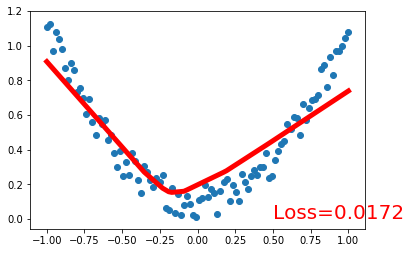

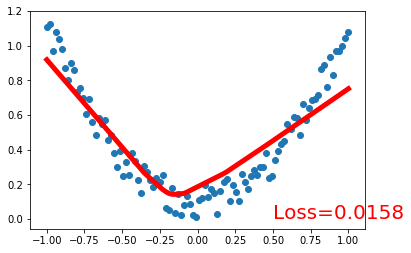

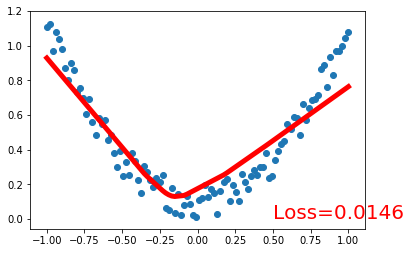

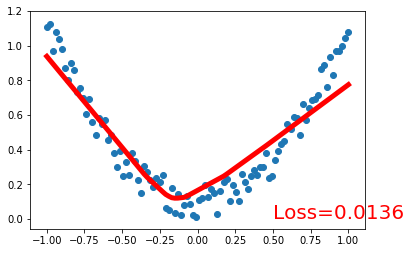

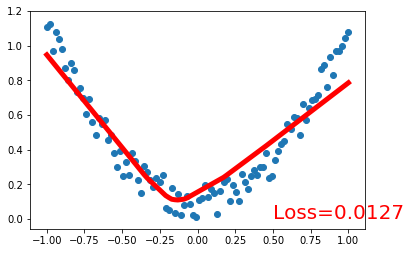

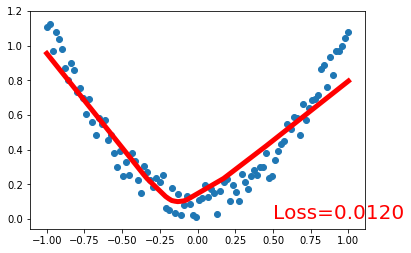

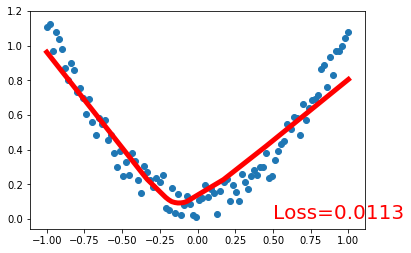

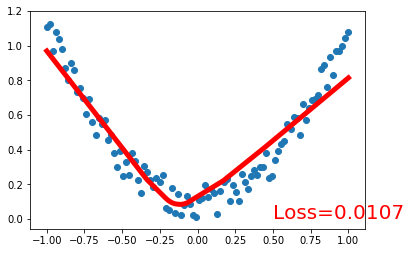

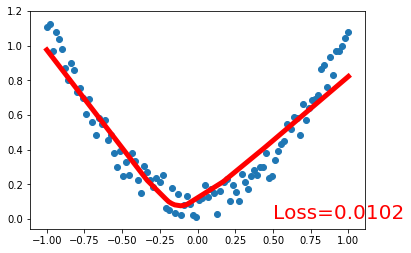

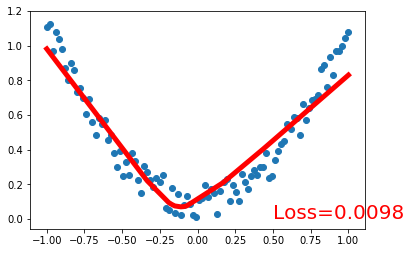

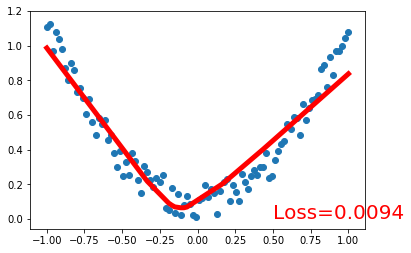

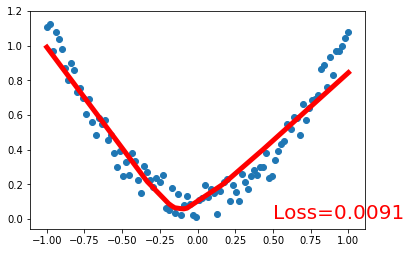

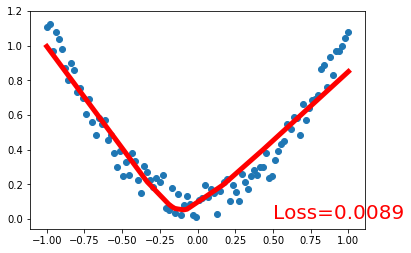

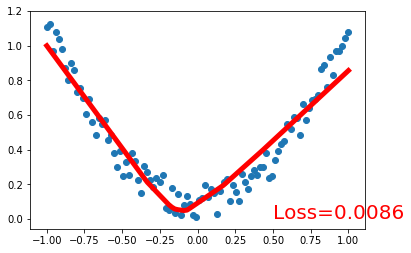

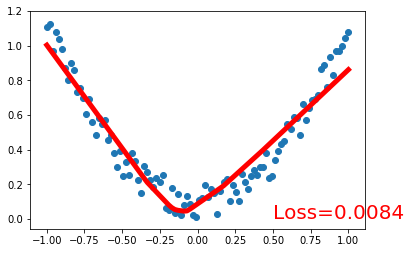

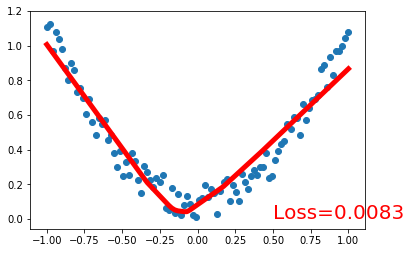

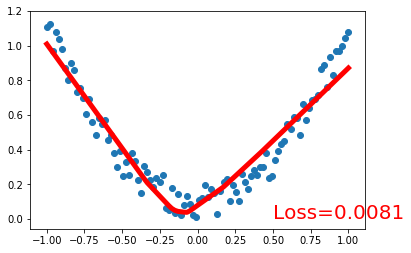

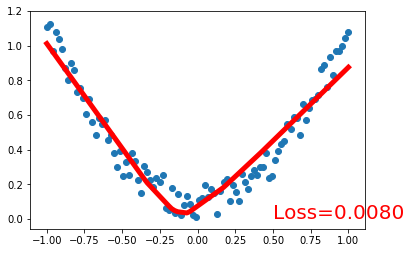

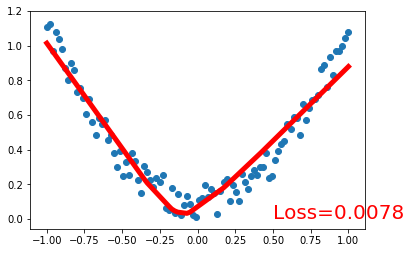

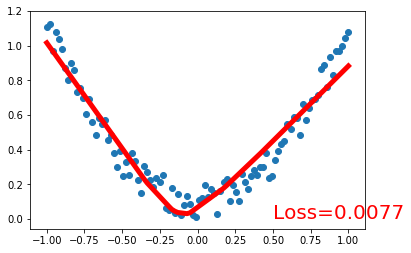

In [9]:
import matplotlib.pyplot as plt

plt.ion()  #动态更新图片，表示打开交互模式。
plt.show()

for i in range(100):
    prediction = net(x)
    #得预测值后进行误差分析
    loss = loss_func(prediction, y)
    #进行参数优化
    optimizer.zero_grad() #清空上一步的残余更新参数值
    loss.backward()     # 误差反向传播, 计算参数更新值
    optimizer.step()   #将参数更新值施加到 net 的 parameters 上
    
    if i % 5 == 0:
        #plot and show learning process
        plt.cla() #Clear the current axes.
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict = {'size': 20, 'color': 'red'})
        plt.pause(0.1)

<n></n>
<n></n>
<n></n>
# 分类

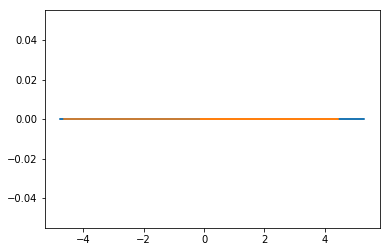

In [34]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

n_data = torch.ones(100, 2)
#torch.normal (mean, std); 其中mean和std都是张量，其shape可以不同，但元素个数需一样。 
#也有torch.normal(menan = 0.0, std=1.0)的默认写法，但两者只能选择一个为默认，需要有一个张量控制大小
x0 = torch.normal(2*n_data, 1) #shape=(100, 2)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.zeros(100)

#x = torch.cat(x0, x1).type(torch.FloatTensor)#FloatTensor = 32-bit floating
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
#y = torch.cat(y0, y1).type(torch.LongTensor)#LongTensor = 64-bit integer
y = torch.cat((y0, y1), ).type(torch.LongTensor)

#torch只能在Variable上训练，所以需要转换类型
x, y = Variable(x), Variable(y)

plt.plot(x.data.numpy(), y.data.numpy())
plt.show()

### 建立神经网络

In [35]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.pridict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.pridict(x)
        return x
    
net = Net(n_feature = 2, n_hidden = 10, n_output = 2)
print(net)

Net (
  (hidden): Linear (2 -> 10)
  (pridict): Linear (10 -> 2)
)


### 训练

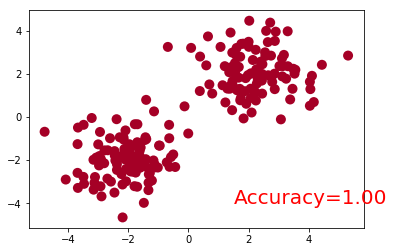

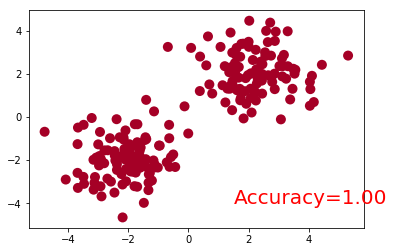

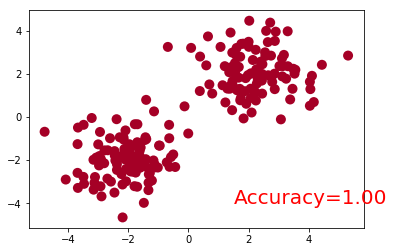

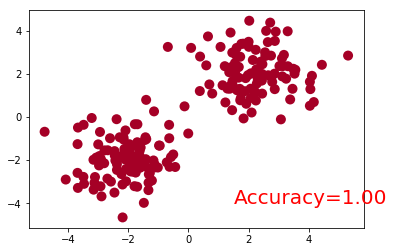

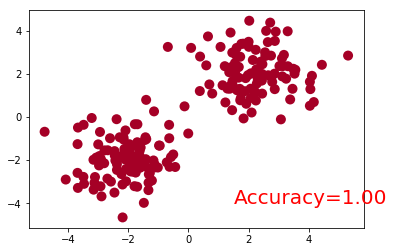

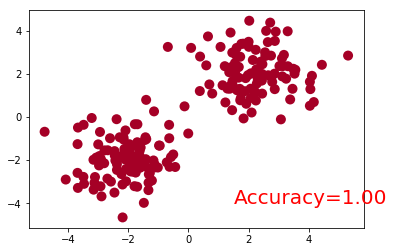

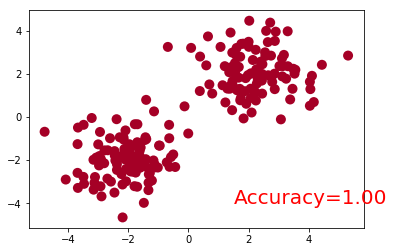

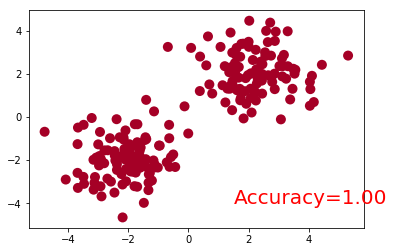

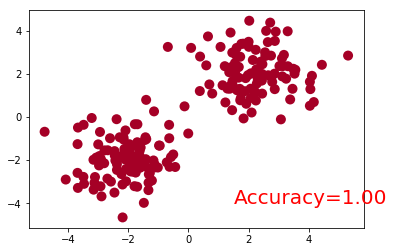

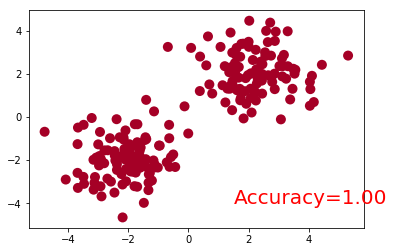

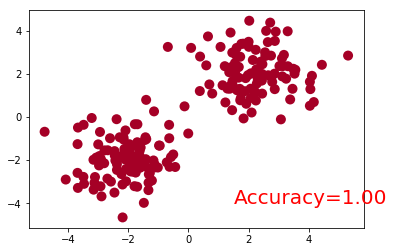

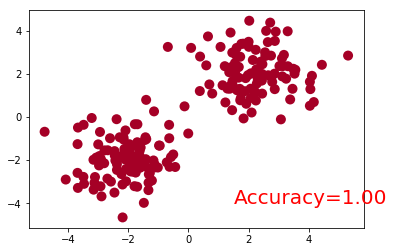

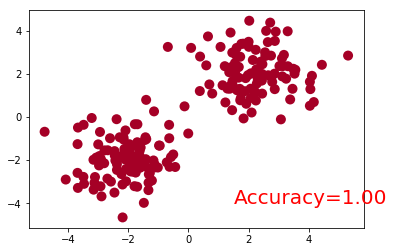

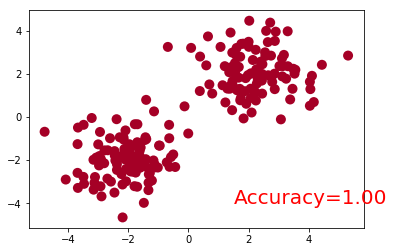

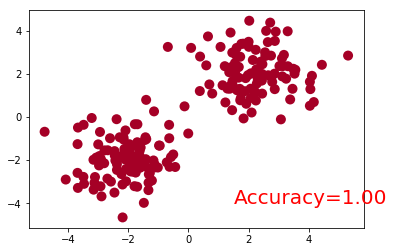

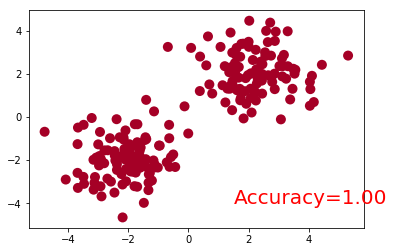

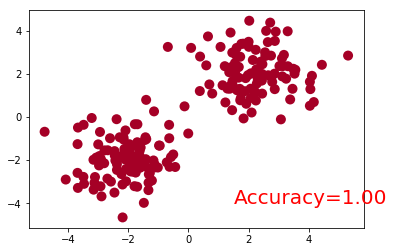

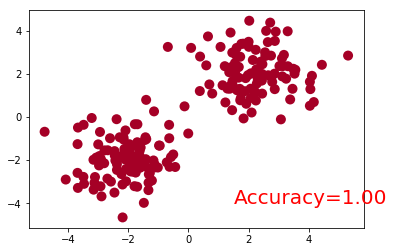

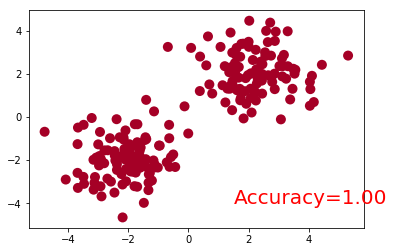

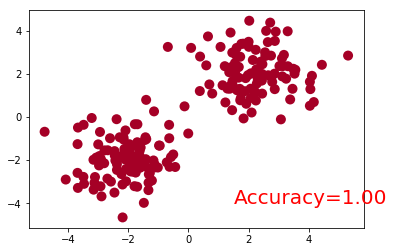

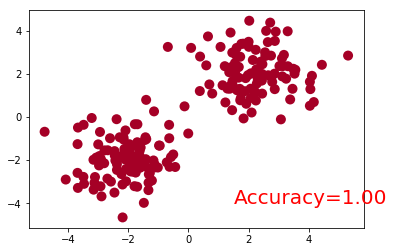

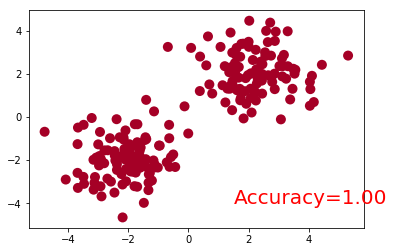

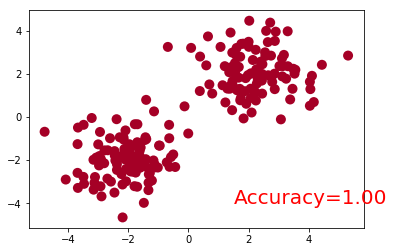

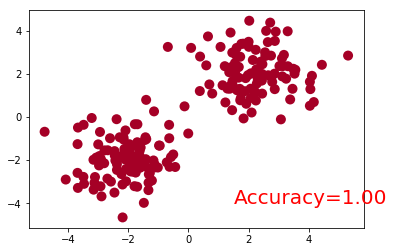

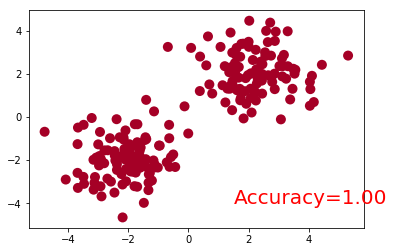

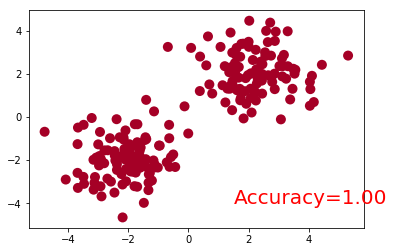

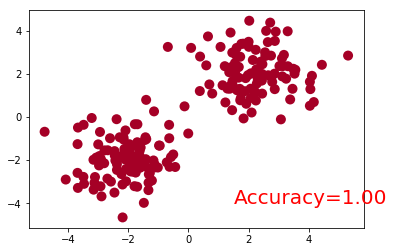

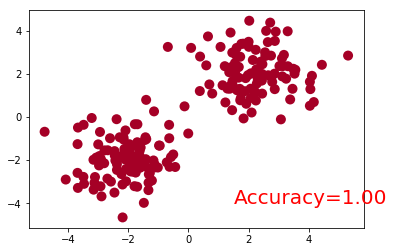

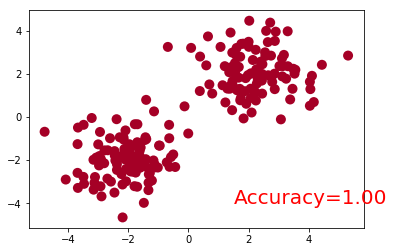

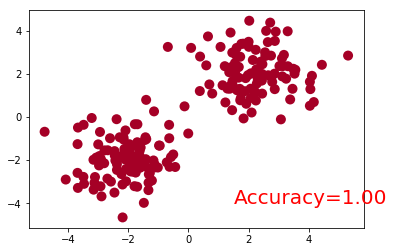

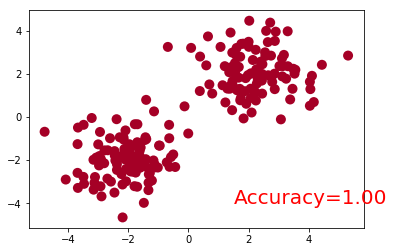

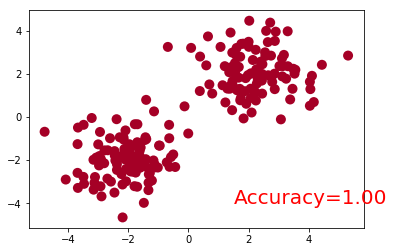

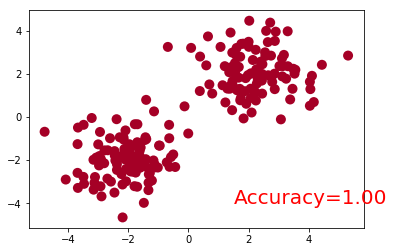

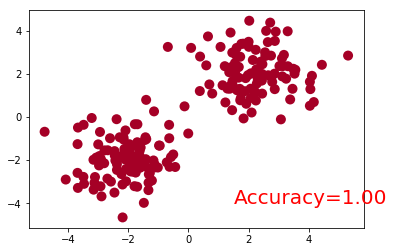

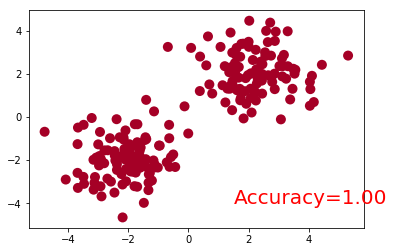

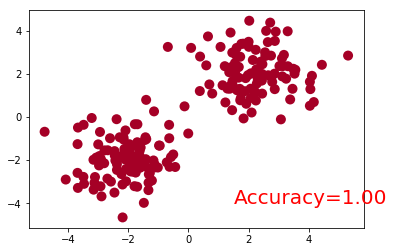

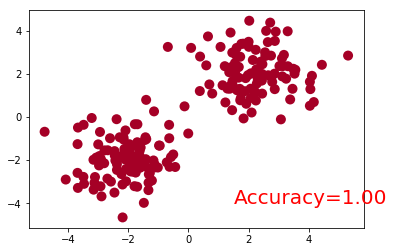

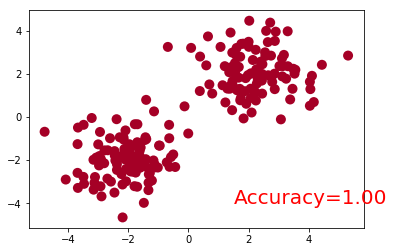

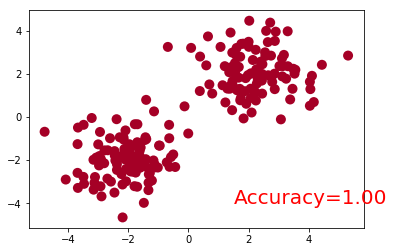

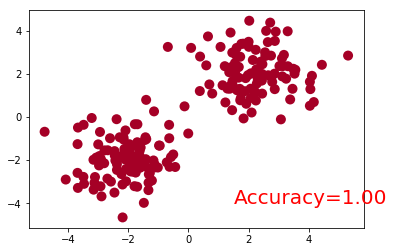

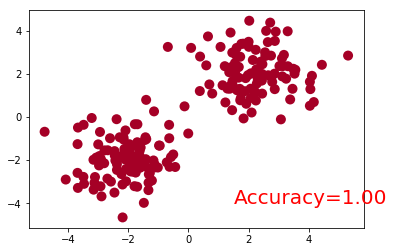

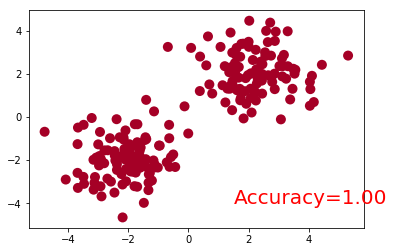

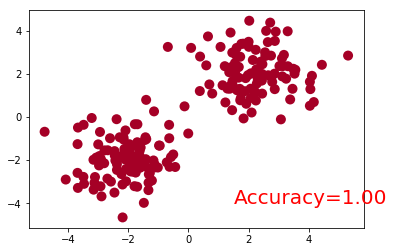

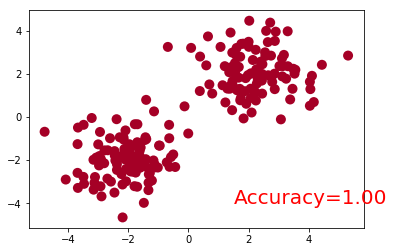

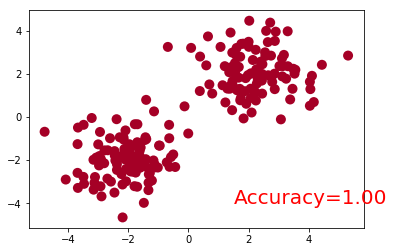

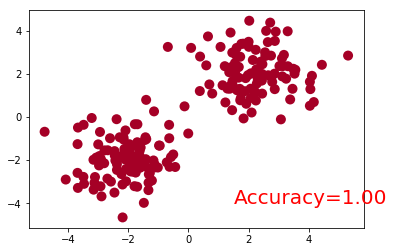

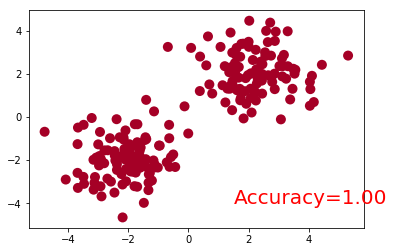

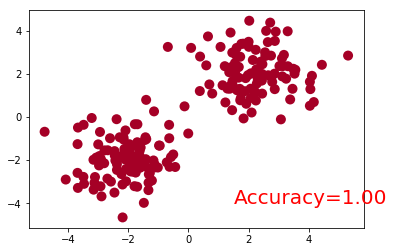

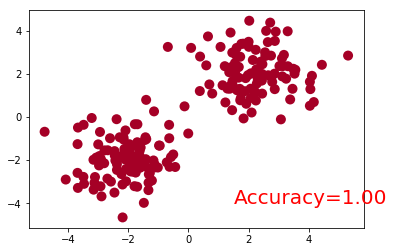

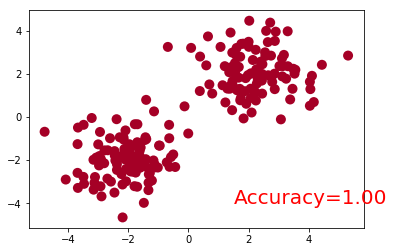

In [44]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()

for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 2 == 0:
        plt.cla()
        #前面得到的是n_output=2个类别的标签，需要经过softmax得到相应的类别。这里采用的是softmax函数
        prediction = torch.max(F.softmax(prediction), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy =  sum(pred_y == target_y)/200
        plt.text(1.5, -4, 'Accuracy=%.2f'% accuracy, fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

# 保存网络

In [55]:
torch.manual_seed(1)    # reproducible

# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

## 有两种方式保存网络
### 保存整个网络
torch.save(net1, 'net.pkl')  #保存整个网络
### 只保存网络中的参数
torch.save(net1.state_dict(), 'net_params.pkl')

## 有两种方式提取网络
### 提取整个网络
def restore_net():
    #restore entire and net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)
### 只提取网络参数
#### 这种方式将会提取所有的参数，然后再放到你的新建网络中
def restore_params():
    #新建net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    
    #将保存的参数复制到net3
    net3.load_start_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

## DataLoader
#### DataLoader用来整理数据结构，进行包装数据，进而进行批处理

In [59]:
import torch
import torch.utils.data as Data

torch.manual_seed(1) #设立随机数种子

Batch_size = 5

x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)


#先转换为torch能识别的Dataset
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor = y)

#把 dataset 放入 DataLoader
loader = torch.utils.data.DataLoader(
    dataset = torch_dataset,#torch TensorDataset format
    batch_size = Batch_size,#mini batch size
    shuffle = True,
    num_workers = 8,#多线程读数据
)

for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        
        print ('Epoch: ', epoch, '| Step: ', step, '| batch x: ', batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [ 6.  7.  2.  3.  1.] | batch y:  [  5.   4.   9.   8.  10.]
Epoch:  0 | Step:  1 | batch x:  [  9.  10.   4.   8.   5.] | batch y:  [ 2.  1.  7.  3.  6.]
Epoch:  1 | Step:  0 | batch x:  [ 10.   3.   1.   6.   5.] | batch y:  [  1.   8.  10.   5.   6.]
Epoch:  1 | Step:  1 | batch x:  [ 8.  4.  2.  9.  7.] | batch y:  [ 3.  7.  9.  2.  4.]
Epoch:  2 | Step:  0 | batch x:  [  1.   8.   5.  10.   2.] | batch y:  [ 10.   3.   6.   1.   9.]
Epoch:  2 | Step:  1 | batch x:  [ 7.  9.  4.  3.  6.] | batch y:  [ 4.  2.  7.  8.  5.]
